# Model Evaluation and Hyperparameter Tuning

# Debugging algorithms with learning and fitting curves

We have learnt two simple yet powerful diagnostic tools that can help us to imporove the performance of a learning algorithm: learning curves and fitting curves. We will discuss how we can use learning curves to diagnose if a learning algorithm has a problem with overfitting or underifitting. Furthermore, we will take a look at fitting curves that help us address the common issues of a learning algorithm.

# Diagnosing problems with learning curves

If a model is too complex for a given training set the model tends to overfit the training data and does not generalize well to unseen data. **Common ways to address this problem** is to collect more training samples to reduce the degree of overfitting. However, in practice it can be more expensive or not feasible to collect more data. By plotting the model training and testing accuracies, we can detect whether the model suffers from underfitting or overfitting, and whether the colleciton of more data would help to address this problem.

## Underfitting

When the learning curve graph shows both low traning and testing/cross-validation accuracy, this indicates that the model underfits the training data. **Common ways to address this problem** is to 
**(1)** increase the number of parameters of the model, for example, by collecting or constructing additional features (e.g., interaction terms, second order polynomial terms, third order polynomial terms, etc), or 
**(2)** decrease the degree of regularization in parametric models( e.g., logistic regression classifiers) if regularization was performed.

## Overfitting

When the learning curve graph shows a large gap between the traning and testing/cross-validation accuracy, this indicates that the model overfits the training data. Common ways to address this problem is to **(1)** collect more trainig data or **(2)** to reduce the complexity of the model, for example, by increasing the regularization paramater; for unregularized models it can also help to **(3)** decrease the number of features via feature selection or feature extraction (i.e., dimensionality reduction). Note that collecting more training data decreases the chances of overfitting. However, it might not always help, for example, when the training data is extremely noisy or the model is already very close to optimal.

In [1]:
############################## Python version compatibility ##############################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

############################## Import Libraries & Modules ################################

%matplotlib inline
# Import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris # Import Iris Data Set
from sklearn import linear_model       # The sklearn.linear_model module implements generalized linear models
import numpy as np                     # NumPy is the package for scientific computing with Python

#################################### Import Dataset #####################################

# Load the Iris data set
# See 'ISOM 672_Decision Trees' for a description of this data set
iris = load_iris()
X = iris.data[:, [2, 3]] # Specify attributes/predictors
y = iris.target          # Specify target variable

############################## Function for Learning Curves ##############################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

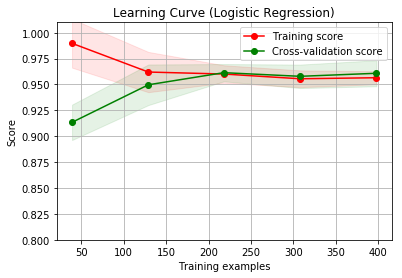

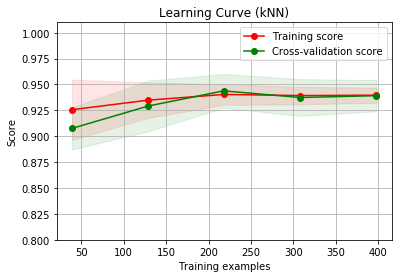

In [5]:
########################### Visualization of Learning Curves ###########################

# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt


title = "Learning Curve (Logistic Regression)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

title = "Learning Curve (kNN)"

# Plots the learning curve based on the previously defined function for the kNN classifier. Uses the 
# random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier() #n_neighbors=5 by default
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

Via the *train_sizes* parameter in the *learning_curve* function, we can control the partial or relative number of training samples that are used to generate the learning curves. Here, we set *train_sizes* = np.linspace(0.1, 1.0 , 5) to use 5 evenly spaced relative intervals for the training set sizes. By default, the *learning_curve* function uses stratified k-fold cross-validation to calculate cross-validation accuracy, and we set *k=10* via the *cv* paramaeter. Then, we simply calculate the average accuracies from the returned cross-validated training and test scores for the diffferent sizes of the training set, which we plott using matplootlib's plot function. Furthermore, we add this standard deviation of the average accuracies to the plot using the *fill_between* function to indicate the variance of the estimate.

# Addressing overfitting and underfitting with fitting graphs

Fitting graphs are another usesful tool for impoving the performance of the model by addressing issues such as overfitting and underfitting. Fitting graphs are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we can vary the values of the model parameters, for example the inverse regularization paramater $C$ in logistic regression.

In [7]:
############################## Import Libraries & Modules ################################

# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# pandas is a library providing high-performance, easy-to-use data structures and data 
# analysis tools for the Python programming language
import pandas as pd 
# Evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score
# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#################################### Import Dataset #####################################

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None) # Read data from link, No Header

X = df.loc[:, 2:].values # Specify attributes/predictors
y = df.loc[:, 1].values  # Specify target variable
le = LabelEncoder()
#print(y)               #See label before transformation
y = le.fit_transform(y) #Labels 'M' as 1 and 'B' as 0
#print(y)               #See label after transformation
print(le.classes_)      #Show the classes that have been encoded

###################################### Classifier ######################################

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
# Class for Logistic Regression (aka logit) classifier.
# Parameter C: Inverse of regularization strength; 
# C must be a positive float; smaller values specify stronger regularization.
clf_lr = linear_model.LogisticRegression(C=1e4) # default: ‘l2’ norm

############################ Performance w/ Cross Validation ############################

# Evaluate performance
# Read more about cross_val_score in the following link 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
# Possible 'scoring' values http://scikit-learn.org/stable/modules/model_evaluation.html
scores=cross_val_score(clf_lr, X=X, y=y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores) # print accuracy for each iteration of cross-validation

scores_f1=cross_val_score(clf_lr, X=X, y=y, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1) # print f1-score for each iteration of cross-validation

['B' 'M']
Accuracy: 0.95 (+/- 0.02)
[ 0.94782609  0.94782609  0.96460177  0.9380531   0.96460177]
F1-score: 0.95 (+/- 0.05)
[ 0.96338384  0.90569106  0.92105263  0.96230159  0.94286669  0.98095556
  0.92460317  0.94337715  0.98112572  0.96190476]


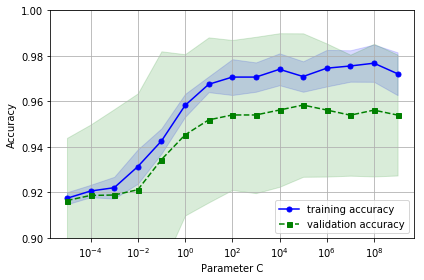

In [14]:
############################### Import Libraries & Modules #################################

# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split
# Class for Logistic Regression classifier
from sklearn.linear_model import LogisticRegression 

np.random.seed(42) #the seed used by the random number generator for np

############################# Parameters - Varying Complexity #############################

# Specify possible parameter values for C.
# Parameter C: Inverse of regularization strength; 
# C must be a positive float; smaller values specify stronger regularization.
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

# Compute scores for an estimator with different values of a specified parameter. 
# This is similar to grid search with one parameter. 
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=LogisticRegression(random_state=0), #Build Logistic Regression Models
                X=X_train, 
                y=y_train, 
                param_name="C", # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="accuracy", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure



Similar to the *learning_curve* function, the *validation_curve* function (i.e., the function that plots the fitting graphs) uses the stratified k-fold cross-validation by default to estimate the performance of the model if we are using algorithms for the classification. Inside the *validation_curve* function, we specified the parameter that we wanted to evaluate. In this case, it is $C$, the inverse regularization parameter of the *LogisticRegression* classifier to assess the *LogisticRegression* object for a specific value range that we set via the param_range parameter. Similar to the learning curve example in the previous section, we plotted the average training and cross-validation accuracies and the corresponding standard deviations. 


Although the differences in the accuracy for varying values of $C$ are subtle, **we can see that the model slightly underfits the data when we increase the regularization strength (small values of $C$)**. However, for large values of $C$, it means lowering the strength of regularization, so the model tends to **slightly overfit the data**. In this case, the sweet spot appears to be around $C=1000$.

# Fine-tuning machine learning models via grid search

In machine learning, we have two types of paramaters: **(1)** those learned from the training data, for example, the weights in logistic regression, and **(2)** the parameters of a learning algorithm that are optimized separately. The latter are the tunning parameters, also called hyperparameters, of a model, for example, the **regularization** parameter in logistic regression or the **depth** of a decision tree.

In the previous section, we used validation curves to improve the performance of a model by tuning one of its hyperparameters. In this section, we will take a look at a powerful hyperparameter optimization technique called grid search that can further help to improve the performance of a model by finding the ** *optimal* combination of hyperparameter values**.

## Tuning parameters via grid search and nested cross-validation

The approach of grid search is quite simple, it is a brute-force exchuastive search pradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination of those to obtain the optimal set.

In [26]:
############################### Import Libraries & Modules #################################

from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

np.random.seed(42) # Ensure reproducability

################################# Nested Cross-Validation #################################

##################################### Parameter Tuning ####################################

# Exhaustive search over specified parameter values for an estimator.
# GridSearchCV implements a “fit” and a “score” method. 
# It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” 
# if they are implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)
    
############################## Decision Tree Parameter Tuning ##############################

# Choosing optimal depth of the tree
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy', # Specifying multiple metrics for evaluation
                  cv=inner_cv)

gs = gs.fit(X,y)
print(" Parameter Tuning #1")
print("Non-nested CV Accuracy: ", gs.best_score_)
print("Optimal Parameter: ", gs.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs = cross_val_score(gs, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())

# See all the parameters you can optimize here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Choosing optimal depth of the tree AND optimal splitting criterion
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy']}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X,y)
print("\n Parameter Tuning #2")
print("Non-nested CV Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt2 = gs_dt2.fit(X,y)
print("\n Parameter Tuning #3")
print("Non-nested CV Accuracy: ", gs_dt2.best_score_)
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())

############################ Logistic Regression Parameter Tuning ############################

# Choosing C parameter (i.e., regularization parameter) for Logistic Regression
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000]}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X,y)
print("\n Parameter Tuning #4")
print("Non-nested CV Accuracy: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())
      
# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
# See other parameters here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X,y)
print("\n Parameter Tuning #5")
print("Non-nested CV Accuracy: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())
 
################################### kNN Parameter Tuning ###################################

#Normalize Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Choosing k for kNN

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}],
                  scoring='accuracy',
                  cv=inner_cv)
#print(len(y))
gs_knn = gs_knn.fit(X,y) 
print("\n Parameter Tuning #6")
print("Non-nested CV Accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())
 
# Choosing k for kNN AND type of distance
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X,y)  
print("\n Parameter Tuning #7")
print("Non-nested CV Accuracy: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())
 

 Parameter Tuning #1
Non-nested CV Accuracy:  0.947275922671
Optimal Parameter:  {u'max_depth': 4}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Nested CV Accuracy:  0.926098431921  +/-  0.0273481397974

 Parameter Tuning #2
Non-nested CV Accuracy:  0.940246045694
Optimal Parameter:  {u'criterion': u'gini', u'max_depth': 5}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion=u'gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Nested CV Accuracy:  0.931408166434  +/-  0.0233506694962

 Paramet

Using the preceding code, we initialized the GridSearchCV objected from the *sklearn.model_selection* module to train and tune various data mining algorithms (i.e., Decision Tree, Logistic Regression, kNN). We set the *param_grid* to a list of dictionaries to specify the parameters that we'd want to tune (e.g., k for KNN, C for logistic regression, max depth for decision tree, etc.). After we used the training data to perform the grid search, we obtained the score of the best-performing model via the *best_score_* attribute and lookd at tis paramaters, that can be accessed via the *best_params_* attribute. For instance, $k=5$ is the $k$ value that yields the best accuracy for kNN algorithm.

Finally, we use the independent test dataset to estimate the performance of the best selected model, which is available via the *best_estimator_* attribute of the *GridSearchCV* object.

# Plotting a ROC graph

*ROC* graphs are useful tools for selecting models for classification based on their performance with respect to the false positive and true positive rates, which are computed by shifting the decision threshold of the classifier. The diagonal of the ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing. A perfect classifier would fall into the top-left corner of the graph with TP rate=1 and FP rate=0. Based on the ROC curve, we can then compute the AUC (i.e., Area Under the Curve) to characterize the performance of a classificaton model.

10-fold cross validation:

ROC AUC: 0.98 (+/- 0.01) [Logistic regression]
ROC AUC: 0.87 (+/- 0.04) [Decision tree]
ROC AUC: 0.96 (+/- 0.02) [kNN]


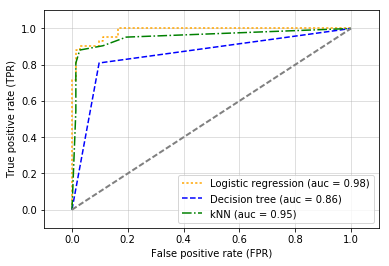

In [27]:
############################### Import Libraries & Modules #################################

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

######################################## Classifiers ########################################

# Logistic Regression Classifier
clf1 = LogisticRegression(penalty='l2', 
                          C=0.01,
                          random_state=1)

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=5,
                            p=2,
                            metric='minkowski')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## ROC graph with cross-validation (An additional example - Focusing on a single classifier)

This example shows the ROC response of different datasets, created from K-fold cross-validation. Taking all of these curves, it is possible to calculate the mean area under curve, and see the variance of the curve when the training set is split into different subsets. This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.

By executing the following code, we will plot an ROC curve of a classifier that only uses two features from the Breast Cancer Wisconsin dataset to predict whether a tumor is bening or malignant. By using just two features, we are making the classification task much more challenging so that the resulting ROC curve becomes visually more interesting. For similar reasons, we are also reducing the number of fols in the *StratifiedKFold* validator to three.

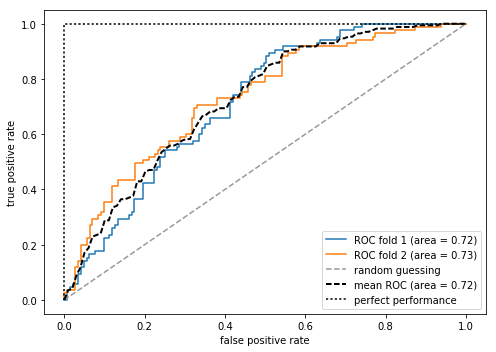

In [28]:
############################### Import Libraries & Modules #################################

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

######################################## Classifier ########################################

# Logistic Regression Classifier
lr = LogisticRegression(penalty='l2',  random_state=1, 
                                           C=100)

X_train2 = X_train[:, [4, 14]] # Classifier that only uses two features from the Breast Cancer Wisconsin dataset
    
#################################### Cross - Validation ####################################

# This cross-validation object is a variation of KFold that returns stratified folds
# The folds are made by preserving the percentage of samples for each class
cv = list(StratifiedKFold(n_splits=2, # Number of folds. Must be at least 2
                          random_state=1).split(X_train, y_train))

##################################### Visualization ######################################

fig = plt.figure(figsize=(7, 5)) # Set figure size

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv): # enumarate allows us to loop over something and have an automatic counter
    probas = lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test]) # make predictions based on classifiers

    fpr, tpr, thresholds = roc_curve(y_train[test], # Get data for ROC curves
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)         # One-dimensional linear interpolation

    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1], # plot random guessing classifier
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)  # plot mearn ROC curve
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 0, 1],  # plot perfect classifier
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

# Figure paramaters: x axis limits, y axis limits, labels of axes, legend position
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('ROC_CrossValidation_Oneclassifier.png', dpi=300)
plt.show() #display figure

# Dealing with class imbalance

In [29]:
# We create an imbalanced data set from our breast cancer data set, which 
# originally consisted of 357 bening tumors (class 0) and 212 malignant tumors (class 1)

# We take all 357 bening tumor samples and stacked them with the first 40 malignant 
# samples to create a severe class imbalance
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

# If we were to predict the accuracy of the model that always predicts the majority class 
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

# Estimated accuracy based on naive rule ~90%
# It would make sense to focus on other metrics than accuracy when comparing different models
# such as precision, recall, ROC curve

89.924433249370267

In [30]:
# Class imbalance influences a learning algorithm during model fitting.
# Since machine learning algorithms typically optimize a reward or cost function that is computed as a 
# sum over the training examples that it sees furing fitting, the decision rule is likely going to be
# biased towards the majority class. In other words, the algorithm implicitly learns a mdoel tha optimizes the
# predictions based on the most abundant class in order to minimize the cost or maximize the reward during training.

from sklearn.utils import resample

# Number of class 1 samples before
print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

# Resampling strategy = take the minority class from the imbalanced data set and repeatedly draw samples
# from it until it contains the same number of samples as class label 0

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1], # Indexable data-structures as input
                                    y_imb[y_imb == 1],
                                    replace=True, # Implements resampling with replacement.
                                    n_samples=X_imb[y_imb == 0].shape[0], # Number of samples to generate.
                                    random_state=123) # The seed of the pseudo random number generator to use when shuffling the data

# Number of class 1 samples after oversampling rare class
print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 40
Number of class 1 samples after: 357


In [31]:
# After resampling, we can stack the original class 0 with the upsampled class 1 subset to obtain a balanced dataset
# as follows:

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

# Consequently if we were to predict the accuracy of the model that always predicts the majority class ~50%
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0